<a href="https://colab.research.google.com/github/Hrit-Saha/ML-Trained-Models/blob/main/Social_Network_Ads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Social Network Ads

## Dataset Description
`Source`: https://www.kaggle.com/datasets/nani123456789/social-network-ads

###**Context**
An international car company wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers.They want to predict whether or not the customer will buy the brand new car that will be launched soon.Based on the prediction the company will advertise the product of social media.

###**Content**
The dataset used for model building contained 400 observations of 5 variables. The data contains the following information:

* `user id` = refers to the id of the person.

* `gender` = male/female

* `age` = age of the person

* `estimated salary` = The amount of salary that the person is getting.

* `purchased` = whether the person has purchased any product or not based on his salary .


## Impoting the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [ ]:
data = pd.read_csv("Social_Network_Ads.csv")
X = data.iloc[:, 2:4].values
y = data.iloc[:, -1].values

## Getting the basic information

In [ ]:
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


# Exploratory Data Analysis(EDA)

The nature of the given data can be better understood when can visually analyse the distribution of features and corelations between the features.

## Analyzing Categorical Feature

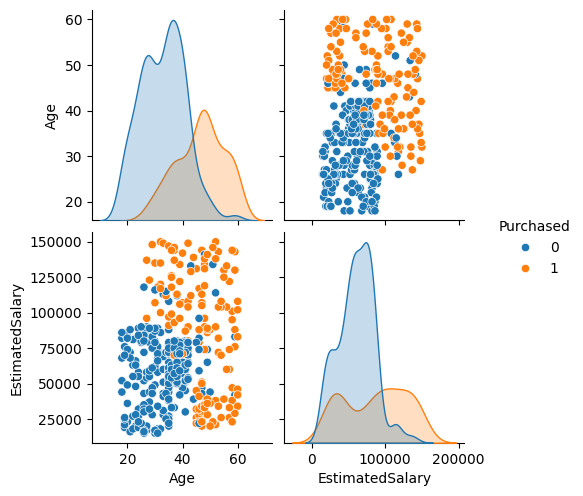

In [ ]:
sns.pairplot(data.drop(columns=["User ID"]), hue='Purchased')

## Insights

* From the pairplot, we observe that as age increases, the estimated salary also rises. This trend is associated with a higher likelihood of purchasing the given product. In reality, individuals with higher salaries are more likely to buy more products.

* Additionally, as age increases, the estimated salary also rises, leading to a greater likelihood of individuals purchasing more products which in reality occurs too.

* Salaries ranging from 0 to 1,00,000 tend not to result in any product purchases. However, salaries ranging from 0 to 2,00,000 are associated with uniform product purchasing.


In [ ]:
data['Gender'].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

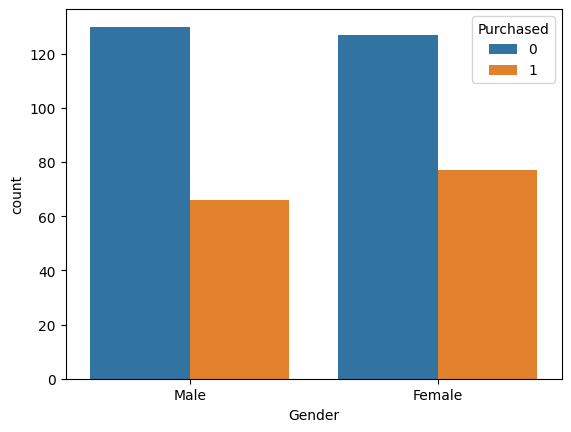

In [ ]:
sns.countplot(x='Gender', data=data, hue='Purchased')

## Insights

* From the above countplot, it appears that both males and females have the same purchasing count. Therefore, we can conclude that the dataset is well-balanced.

## Analysing Numerical Feature

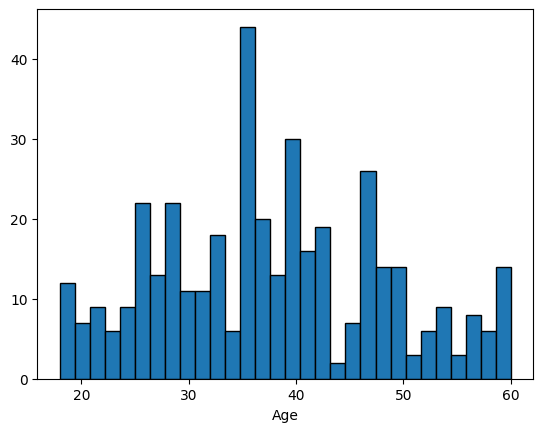

In [ ]:
data['Age'].hist(bins=30, edgecolor = 'black')
plt.xlabel('Age')
plt.grid(False)

* Younger individuals (aged 20-30) may have a higher tendency to purchase a new car compared to older age groups. This could be due to their interest in new trends and greater flexibility in disposable income.

(array([51., 39., 58., 50., 82., 40., 22., 19., 17., 22.]),
 array([ 15000.,  28500.,  42000.,  55500.,  69000.,  82500.,  96000.,
        109500., 123000., 136500., 150000.]),
 <BarContainer object of 10 artists>)

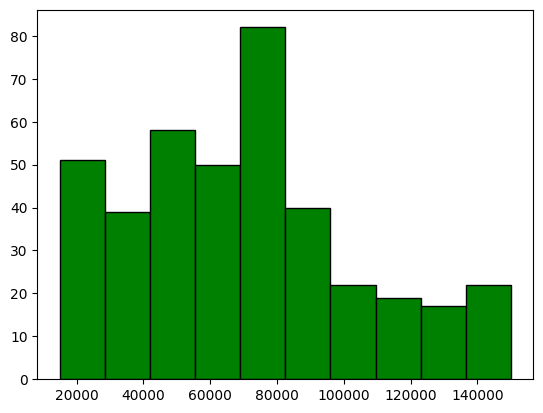

In [ ]:
plt.hist(data['EstimatedSalary'], color = 'green', edgecolor = 'black')

In [ ]:
data['Age'].describe()

count    400.000000
mean      37.655000
std       10.482877
min       18.000000
25%       29.750000
50%       37.000000
75%       46.000000
max       60.000000
Name: Age, dtype: float64

In [ ]:
data['EstimatedSalary'].describe()

count       400.000000
mean      69742.500000
std       34096.960282
min       15000.000000
25%       43000.000000
50%       70000.000000
75%       88000.000000
max      150000.000000
Name: EstimatedSalary, dtype: float64

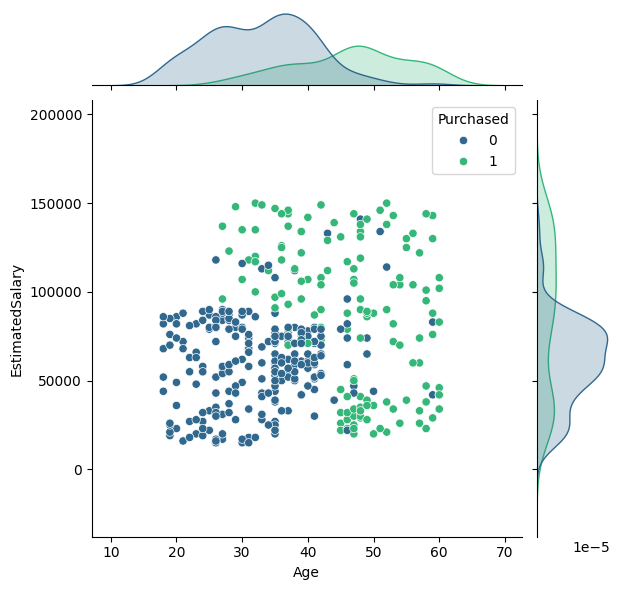

In [ ]:
sns.jointplot(x='Age', y='EstimatedSalary', data = data, hue='Purchased', palette='viridis')

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(
    data=[
        go.Scatter3d(
            x=data[data['Gender'] == gender]['Age'],
            y=data[data['Gender'] == gender]['EstimatedSalary'],
            z=data[data['Gender'] == gender]['Purchased'],
            mode='markers',
            name=str(gender),
            marker=dict(
                size=6,
                color= {'Female': 'red', 'Male': 'blue'}[gender],
                opacity=1,
                line=dict(
                    width=1,
                    color='black'
                )
            )
        ) for gender in data['Gender'].unique()
    ],
    layout=dict(
                margin=dict(l=0, r=0, b=0, t=0),
                legend=dict(title="Gender", x=0, y=0, font=dict(size=16)),
                width=800, height=600,
                scene=dict(
                    xaxis=dict(title='Age'),                  # Set xlabel
                    yaxis=dict(title='Estimated Salary'),     # Set ylabel
                    zaxis=dict(title='Gender'),               # Set zlabel
                )
            )
)

fig.show()

# ML Model Implementation

By analysis the complexity of data based on various aspects like number of features, their varying scales, distribution of numerical features and the labels of categorical features, we can come to the conclusion that certain ML models may fit well to this dataset and predict target variable with high accuracy.
1. `K-Nearest Neighbors`
2. `Logistic Regression`

`purchased` target feature and it is of categorical nature.

# K-Nearest Neighbors

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the K-NN model on the Training set

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

## Predictions and Evaluations

In [ ]:
prediction = classifier.predict(X_test)
print(np.concatenate((prediction.reshape(len(prediction),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
confu_mat = confusion_matrix(y_test, prediction)
print(confu_mat)
accuracy_score(y_test, prediction)

[[64  4]
 [ 3 29]]


0.93

## Analysing the confusion matrix
* We have the Confusion Matrix showing that we have indeed 64 correct predictions of the class meaning the customers of the test set who didn't buy the new car.

* Then 29 correct predictions of the class meaning correct predictions of the customers who bought the car.

* Then 4 incorrect predictions of the class meaning three incorrect predictions of the customers who, bought in reality the car bought were predicted not to.

* And finally, 3 incorrect predictions of the class meaning eight customers who in reality didn't buy the car but were predicted to buy it.


And here we get 0.93 accuracy, which means that we had 89% of correct predictions in the test set.

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
prediction = classifier.predict(X_test)
print(np.concatenate((prediction.reshape(len(prediction),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
con_mat = confusion_matrix(y_test, prediction)
print(con_mat)
accuracy_score(y_test, prediction)

[[65  3]
 [ 8 24]]


0.89

## Analysing the confusion matrix
* We have the Confusion Matrix showing that we have indeed 65 correct predictions of the class meaning the customers of the test set who didn't buy the new car.

* Then 24 correct predictions of the class meaning correct predictions of the customers who bought the car.

* Then 3 incorrect predictions of the class meaning three incorrect predictions of the customers who, bought in reality the car bought were predicted not to.

* And finally, 8 incorrect predictions of the class meaning eight customers who in reality didn't buy the car but were predicted to buy it.


And here we get 0.89 accuracy, which means that we had 89% of correct predictions in the test set.